In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [2]:
data = pd.read_csv("cars.csv")

In [3]:
data

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
data.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
categorical_features = ['Brand', 'Model','Transmission','Fuel_Type','Owner_Type','Seats']
numeric_features = ['Year','Kilometers_Driven','Mileage', 'Engine', 'Power']

In [7]:
for column in categorical_features:
    print(column," : ",data[column].nunique())
    print(column," : ", data[column].unique(),"\n")

Brand  :  11
Brand  :  ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes'] 

Model  :  58
Model  :  ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport'] 

Transmission  :  2
Transmission  :  ['Manual' 'Automatic'] 

Fuel_Type  :  2
Fuel_Type  :  ['Petrol' 'Diesel'] 

Owner_Type  :  3
Owner_Type  :  ['First' 'Second' 'Third'] 

Seats  :  3
Seats  :  [5 4 7] 



In [8]:
for column in categorical_features:
    mapping = {value: index for index, value in enumerate(data[column].unique())}
    data[column] = data[column].map(mapping)

In [9]:
# Split dataset into features and target
X = data.drop(columns=["Price","Car_ID"])
y = data["Price"]

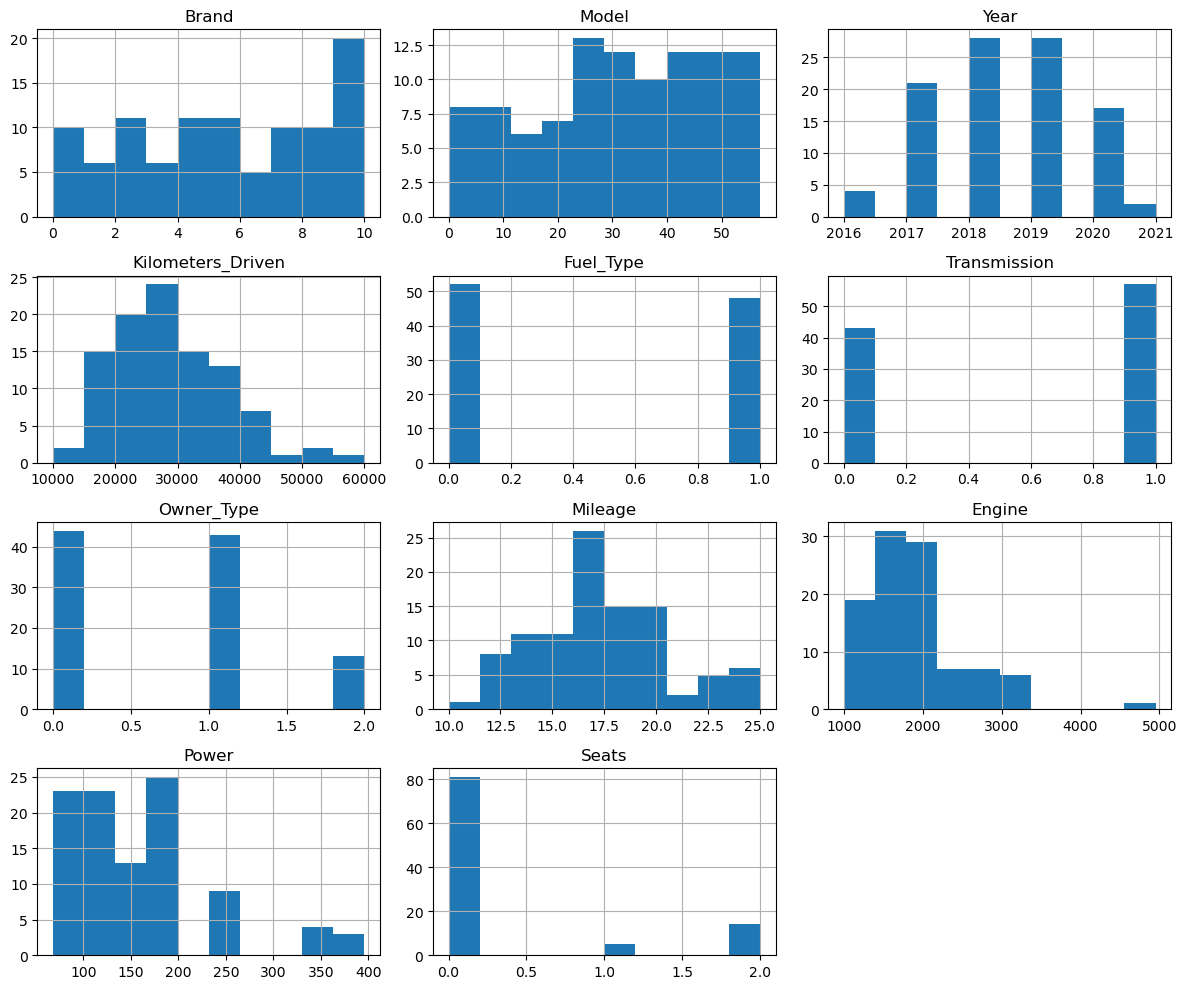

In [10]:
# Graphical Representation - Histograms
X.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

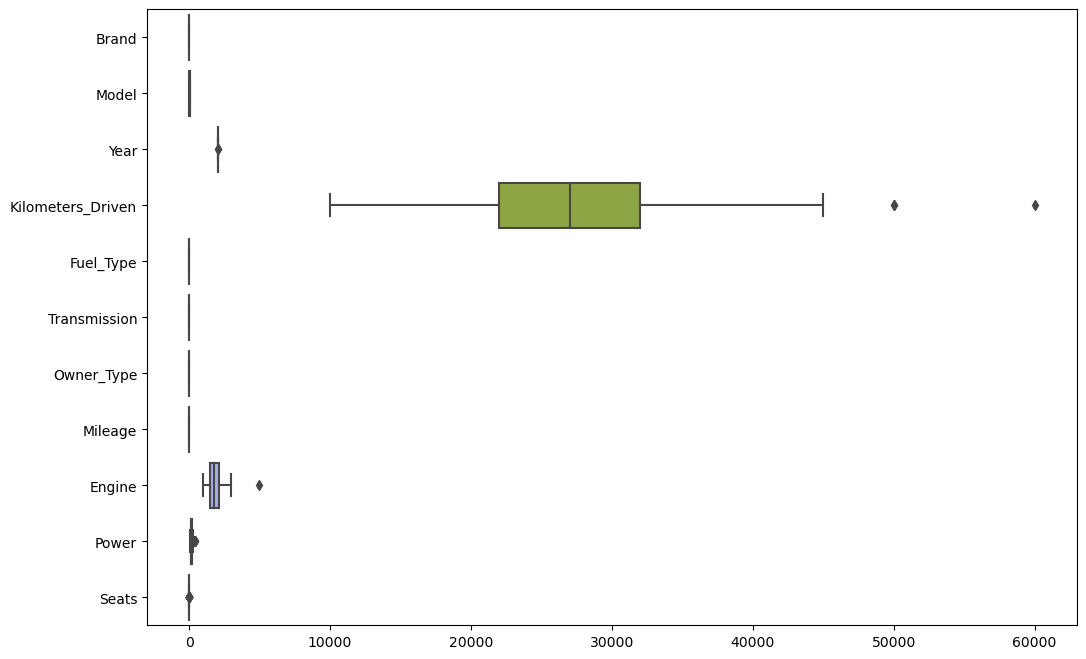

In [11]:
# Graphical Representation - Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h')
plt.show()

In [12]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Feature scaling
])

In [14]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Handle missing values
    # You may add more steps here such as one-hot encoding or ordinal encoding
])

In [15]:
# Combine preprocessing steps for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [17]:
# Define hyperparameters grid for Grid Search
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'regressor__max_depth': [None, 5, 10, 20]},
    'Random Forest': {'regressor__n_estimators': [50, 100, 200]},  # Specify n_estimators here
    'Support Vector Machine': {'regressor__C': [0.1, 1, 10], 'regressor__gamma': [0.1, 0.01, 0.001], 'regressor__kernel': ['rbf']},
    'K-Nearest Neighbors': {'regressor__n_neighbors': [3, 5, 7, 9]}
}

In [18]:
best_model = None
best_score = float('-inf')

In [19]:
# Perform Grid Search with cross-validation for each regressor
for reg_name, reg in regressors.items():
    print(f"\nPerforming Grid Search CV for {reg_name}...")
    if reg_name in param_grids:
        param_grid = param_grids[reg_name]
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', RFE(estimator=RandomForestRegressor(n_estimators=100))),
            ('regressor', reg)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
        grid_search.fit(X_train, y_train)
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_}")
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_model = grid_search.best_estimator_
    else:
        # If there are no hyperparameters to tune, just perform cross-validation
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', RFE(estimator=RandomForestRegressor())),
            ('regressor', reg)
        ])
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', error_score='raise')
        print(f"Cross-validation scores: {scores}")
        print(f"Mean negative mean squared error: {scores.mean()}")
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_model = pipeline



Performing Grid Search CV for Linear Regression...
Best parameters: {}
Best cross-validation score: -202559530286.25366

Performing Grid Search CV for Decision Tree...
Best parameters: {'regressor__max_depth': None}
Best cross-validation score: -100843750000.0

Performing Grid Search CV for Random Forest...
Best parameters: {'regressor__n_estimators': 200}
Best cross-validation score: -70151102735.56194

Performing Grid Search CV for Support Vector Machine...
Best parameters: {'regressor__C': 10, 'regressor__gamma': 0.1, 'regressor__kernel': 'rbf'}
Best cross-validation score: -1093056546263.915

Performing Grid Search CV for K-Nearest Neighbors...
Best parameters: {'regressor__n_neighbors': 5}
Best cross-validation score: -117385000000.0


In [20]:
print(f"\nBest Model: {best_model}")

# Fit the best model to training data
best_model.fit(X_train, y_train)


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Power']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Brand', 'Model',
                       

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Power']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Brand', 'Model',
                                                   'Transmission', 'Fuel_Type',
                                                   'Owner_Type', 'Seats'])])),
                ('feature_selection', RFE(estimator=RandomForestRegressor())),
                ('regressor', RandomForestRegressor(n_estimators=200))])

In [21]:
# Predictions on test data
y_pred = best_model.predict(X_test)

In [22]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 127155178125.0
R-squared: 0.8445250619001039
